In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [38]:
observation = 1500
x1 = np.random.uniform(low=-10,high=10,size=(observation,1))
x2 = np.random.uniform(low=-10,high=10,size=(observation,1))
generated_inputs = np.column_stack((x1,x2))
noise = np.random.uniform(low=-1,high=1,size=(observation,1))
generated_targets = 7.5*x1 - 11*x2 -3.5 + noise
np.savez("TF_intro",inputs=generated_inputs,targets=generated_targets)


In [39]:
data = np.load("TF_intro.npz")


In [40]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer=tf.random_uniform_initializer(-0.1,0.1),
                                                   bias_initializer=tf.random_uniform_initializer(-0.1,0.1))
                         
                             ])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=optimizer,loss="mean_squared_error")
model.fit(data['inputs'], data['targets'], epochs=100, verbose=2)


Epoch 1/100
1500/1500 - 0s - loss: 186.4991
Epoch 2/100
1500/1500 - 0s - loss: 0.3989
Epoch 3/100
1500/1500 - 0s - loss: 0.3568
Epoch 4/100
1500/1500 - 0s - loss: 0.3949
Epoch 5/100
1500/1500 - 0s - loss: 0.3768
Epoch 6/100
1500/1500 - 0s - loss: 0.4243
Epoch 7/100
1500/1500 - 0s - loss: 0.3766
Epoch 8/100
1500/1500 - 0s - loss: 0.3770
Epoch 9/100
1500/1500 - 0s - loss: 0.3937
Epoch 10/100
1500/1500 - 0s - loss: 0.3771
Epoch 11/100
1500/1500 - 0s - loss: 0.3765
Epoch 12/100
1500/1500 - 0s - loss: 0.3947
Epoch 13/100
1500/1500 - 0s - loss: 0.3817
Epoch 14/100
1500/1500 - 0s - loss: 0.3682
Epoch 15/100
1500/1500 - 0s - loss: 0.3947
Epoch 16/100
1500/1500 - 0s - loss: 0.3892
Epoch 17/100
1500/1500 - 0s - loss: 0.3738
Epoch 18/100
1500/1500 - 0s - loss: 0.3775
Epoch 19/100
1500/1500 - 0s - loss: 0.3858
Epoch 20/100
1500/1500 - 0s - loss: 0.3805
Epoch 21/100
1500/1500 - 0s - loss: 0.3813
Epoch 22/100
1500/1500 - 0s - loss: 0.3858
Epoch 23/100
1500/1500 - 0s - loss: 0.3883
Epoch 24/100
1500/

In [41]:
model.layers[0].get_weights()


[array([[  7.5060782],
        [-10.990955 ]], dtype=float32),
 array([-3.4976861], dtype=float32)]

In [42]:
weights = model.layers[0].get_weights()[0]
weights

array([[  7.5060782],
       [-10.990955 ]], dtype=float32)

In [43]:
bias = model.layers[0].get_weights()[1]
bias

array([-3.4976861], dtype=float32)

In [44]:
model.predict_on_batch(data["inputs"]).round(2)

array([[ 66.75],
       [-79.75],
       [-40.48],
       ...,
       [119.02],
       [117.94],
       [-39.49]], dtype=float32)

In [45]:
data["targets"].round(2)

array([[ 66.13],
       [-79.07],
       [-40.45],
       ...,
       [119.64],
       [118.49],
       [-40.27]])

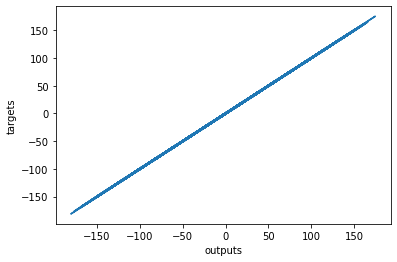

In [47]:
# plt.plot(np.squeeze(model.predict_on_batch(data['inputs'])),np.squeeze(data["targets"]))
plt.plot(model.predict_on_batch(data['inputs']),data["targets"])

plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
